In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'


In [2]:
milcent = pd.read_csv('../Data/datasets/Milcent/milcent1973detail.txt', ',')

crete = pd.read_csv('../Data/datasets/Alphabet_cores/crete_det.txt',' ')

SiteA = pd.read_csv('../Data/datasets/Alphabet_cores/AlfabetFromBo/SiteA_det.txt', ' ')
SiteB = pd.read_csv('../Data/datasets/Alphabet_cores/AlfabetFromBo/SiteB_det.txt', ' ')
SiteD = pd.read_csv('../Data/datasets/Alphabet_cores/AlfabetFromBo/SiteD_det.txt', ',')
SiteE = pd.read_csv('../Data/datasets/Alphabet_cores/AlfabetFromBo/SiteE_det.txt', ' ')
SiteF = pd.read_csv('../Data/datasets/Alphabet_cores/AlfabetFromBo/SiteF_det.txt', ',')
SiteG = pd.read_csv('../Data/datasets/Alphabet_cores/AlfabetFromBo/SiteG_det.txt', ' ')
SiteH = pd.read_csv('../Data/datasets/Alphabet_cores/AlfabetFromBo/SiteH_det.txt', ',')

B19 = pd.read_csv('../Data/datasets/B_cores_AWI/AWI_Bcores__Cleaned_CSV/B19__LT.txt', ',')
B22 = pd.read_csv('../Data/datasets/B_cores_AWI/AWI_Bcores__Cleaned_CSV/B22__LT.txt', ',')
B23 = pd.read_csv('../Data/datasets/B_cores_AWI/AWI_Bcores__Cleaned_CSV/B23__LT.txt', ',')


AllData = {'milcent': milcent, 'crete': crete, 'SiteA': SiteA, 'SiteB': SiteB, 'SiteD': SiteD, \
          'SiteE': SiteE, 'SiteF': SiteF, 'SiteG': SiteG, 'SiteH': SiteH, 'B19': B19, 'B22': B22, 'B23': B23}

In [91]:
CoreNames = ['milcent','crete','SiteA','SiteB','SiteD','SiteE','SiteF','SiteG','SiteH','B19','B22','B23']
CoreColors = ['slategray','indianred', 'orangered','darkslategray', 'slategray', 'cadetblue', 'darkseagreen', 'tan', 'rosybrown', 'peru', 'olive', 'olivedrab', 'forestgreen']

milcent
crete
SiteA
SiteB
SiteD
SiteE
SiteF
SiteG
SiteH
B19
B22
B23


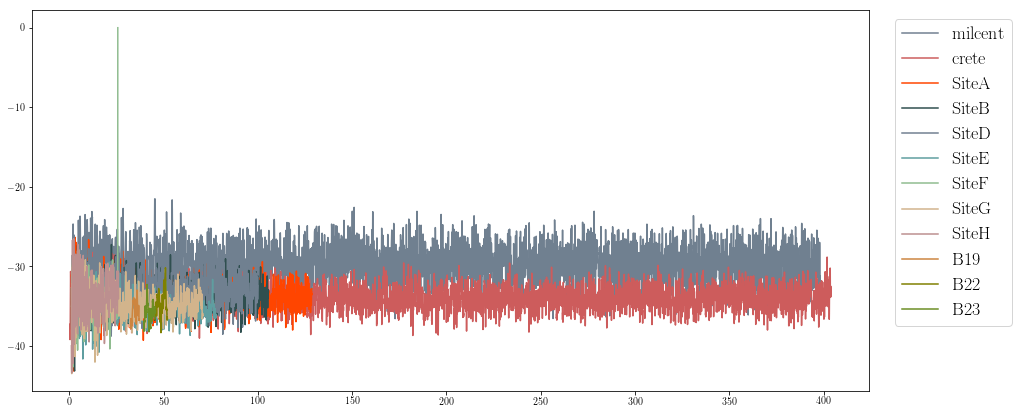

In [92]:
figMC, axMC = plt.subplots(figsize=(15,7))

for name,col in zip(CoreNames,CoreColors):
    print(name)
    axMC.plot(AllData[name]['depth'][1:], AllData[name]['d18O'][1:], label=name, color=col)
#axMC.set( ylim=(-43,-22),xlim=(0,25))
axMC.legend(fontsize=18, bbox_to_anchor=(1.02,1), loc='upper left')

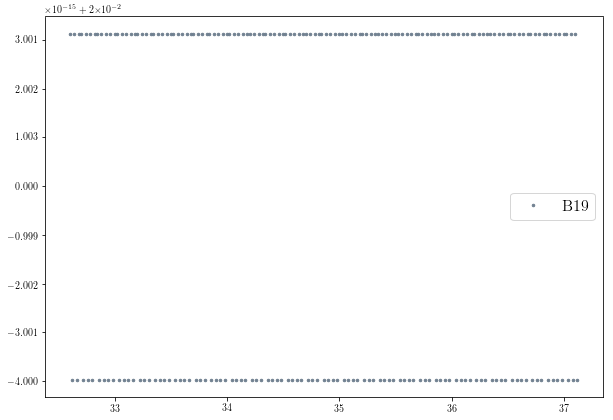

In [80]:
figDiff, axDiff = plt.subplots(figsize=(10,7))
for name,col in zip(CoreNames,CoreColors):
    diff = np.diff(AllData[name]['depth'])
    x = AllData[name]['depth'][1:]
    axDiff.plot(x,diff,'.', label=name, ms=5, color=col)
axDiff.legend(fontsize=16)
#axDiff.set(xlim=(32,53))

In [85]:
d = AllData['B19']['depth']
x = AllData['B19']['d18O']
Delta = 0.02

d_min = Delta * np.ceil(d.values[0]/Delta)
d_max = Delta * np.floor(d.values[-1]/Delta)

n = int(1 + (d_max - d_min)/Delta)
j_int = list(range(1,n))
j_arr = np.linspace(1,n,n)
dhat = d_min + (j_arr - 1)*Delta


In [86]:
len(dhat)

227

In [87]:
from scipy import interpolate

f = interpolate.CubicSpline(d,x)

In [88]:
new = f(dhat)

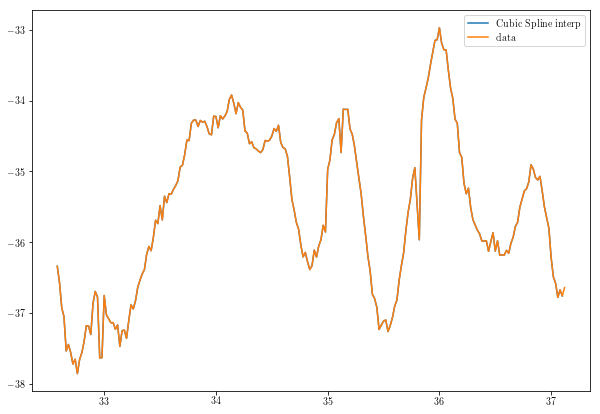

In [90]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(dhat,new, label='Cubic Spline interp')
ax.plot(d,x, label='data')
ax.legend()
#ax.set(xlim=(,355), ylim=(-40,-25))


In [57]:
np.diff(dhat)

array([0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002])